# Assignments - Numerical greeks

1. Introduce two class variables in Pricer that store the finite difference method (forward, backward, central) to be used in numerical greek calculation, and whether the bump size is absolute or relative. Create two Enums to store the labels. Implement all combinations for delta and gamma calculation.<br>Compare greeks using the analytic and the finite difference methods on a set of European options and visualize the numerical error. Compare absolute and relative bumping and suggest optimal bump sizes. Work with the code in src folder. **(15 points)**

In [1]:
import sys
from pathlib import Path
current = Path(Path().resolve())
sys.path.append(str(current))
sys.path.append(str(current.parents[2]))

from src.utils import *
from src.market_data import *
from mkt import *
from homeworks.LDXI4IN.FlatVol.enums import *
from homeworks.LDXI4IN.FlatVol.contract import *
from homeworks.LDXI4IN.FlatVol.model import *
from homeworks.LDXI4IN.FlatVol.pricer import *


import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

MarketData.initialize()

QuantCourseBP 905abc0f1538c66d0a97469d15a6bcb06e8d982f*


In [84]:
MarketData.get_spot()["TEST_COMPANY"]

100.0

In [10]:
underlying = Stock.BLUECHIP_BANK
model = BSVolModel(underlying)
print(MarketData.get_spot()[underlying])
contract = EuropeanContract(underlying, "CALL", "Long", 100, 1)
pricer =EuropeanAnalyticPricer(contract, model, Params())
pricer.calc_delta("BUMP")
pricer.calc_gamma("BUMP")

130.17


# Finite difference method

In [15]:
central=np.zeros(20)
backward=np.zeros(20)
forward=np.zeros(20)

K = np.linspace(80, 180, 20)
for i in range(len(K)):
    contract = EuropeanContract(underlying, "CALL", "Long", K[i], 1)
    pricer=EuropeanAnalyticPricer(contract, model, Params())
    analytic=pricer.calc_delta("ANALYTIC")
    pricer.finite_diff_method="CENTRAL"
    central[i]=pricer.calc_delta("BUMP")/analytic-1
    pricer.finite_diff_method="BACKWARD"
    backward[i]=pricer.calc_delta("BUMP")/analytic-1
    pricer.finite_diff_method="FORWARD"
    forward[i]=pricer.calc_delta("BUMP")/analytic-1

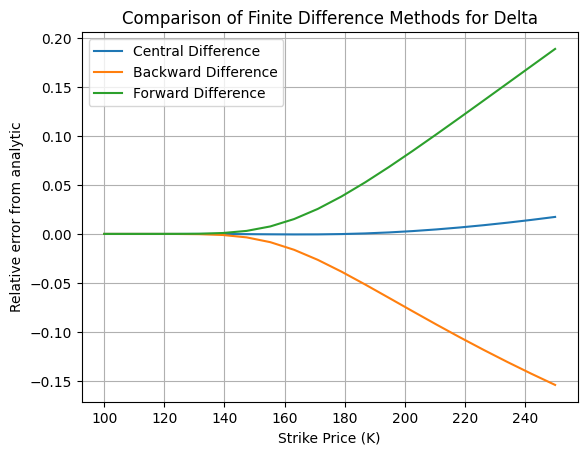

In [28]:
plt.plot(K, central, label="Central Difference")
plt.plot(K, backward, label="Backward Difference")
plt.plot(K, forward, label="Forward Difference")

plt.title("Comparison of Finite Difference Methods for Delta")
plt.xlabel("Strike Price (K)")
plt.ylabel("Relative error from analytic")
plt.legend()
plt.grid(True)


In [ ]:
# same for other underlying, maturity

In [25]:
underlying = Stock.TIPTOP_SOLUTIONS
model = BSVolModel(underlying)
central=np.zeros(20)
backward=np.zeros(20)
forward=np.zeros(20)

K = np.linspace(100, 250, 20)
for i in range(len(K)):
    contract = EuropeanContract(underlying, "CALL", "Long", K[i], 0.1)
    pricer=EuropeanAnalyticPricer(contract, model, Params())
    analytic=pricer.calc_delta("ANALYTIC")
    pricer.finite_diff_method="CENTRAL"
    central[i]=pricer.calc_delta("BUMP")/analytic-1
    pricer.finite_diff_method="BACKWARD"
    backward[i]=pricer.calc_delta("BUMP")/analytic-1
    pricer.finite_diff_method="FORWARD"
    forward[i]=pricer.calc_delta("BUMP")/analytic-1

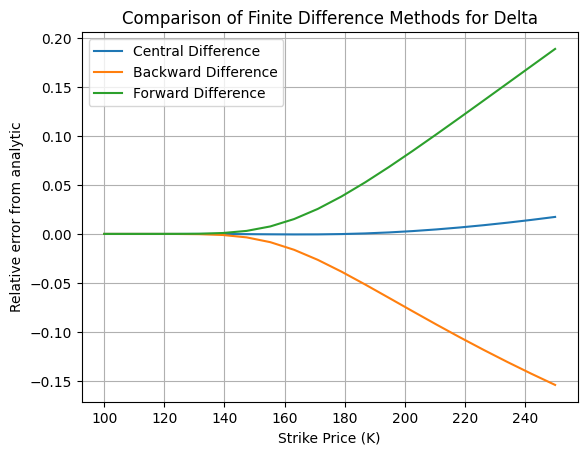

In [27]:
plt.plot(K, central, label="Central Difference")
plt.plot(K, backward, label="Backward Difference")
plt.plot(K, forward, label="Forward Difference")

plt.title("Comparison of Finite Difference Methods for Delta")
plt.xlabel("Strike Price (K)")
plt.ylabel("Relative error from analytic")
plt.legend()
plt.grid(True)


Based on the plots the central difference works better. The error is increasing as strike prize does for all methods. In the next test we want to check weather relative or absolute bumping is advantageous.

# Bump type and size

In [63]:
rel_delta=np.zeros((20, 100))
rel_gamma=np.zeros((20, 100))
abs_delta=np.zeros((20, 100))
abs_gamma=np.zeros((20, 100))


K = np.linspace(80, 180, 20)
bump_size=np.logspace(-5, 0.1, 100)
for i in range(len(K)):
    for j in range(len(bump_size)):
        contract = EuropeanContract(underlying, "CALL", "Long", K[i], 1)
        pricer=EuropeanAnalyticPricer(contract, model, Params())
        d_analytic=pricer.calc_delta("ANALYTIC")
        g_analytic=pricer.calc_gamma("ANALYTIC")
        pricer.finite_diff_method="CENTRAL"
        pricer.bump_size=bump_size[j]/100
        pricer.sizetype="RELATIVE"
        rel_delta[i][j]=pricer.calc_delta("BUMP")/d_analytic-1
        rel_gamma[i][j]=pricer.calc_gamma("BUMP")/g_analytic-1
        pricer.bump_size=bump_size[j]
        pricer.sizetype="ABSOLUTE"
        abs_delta[i][j]=pricer.calc_delta("BUMP")/d_analytic-1
        abs_gamma[i][j]=pricer.calc_gamma("BUMP")/g_analytic-1

<IPython.core.display.Javascript object>


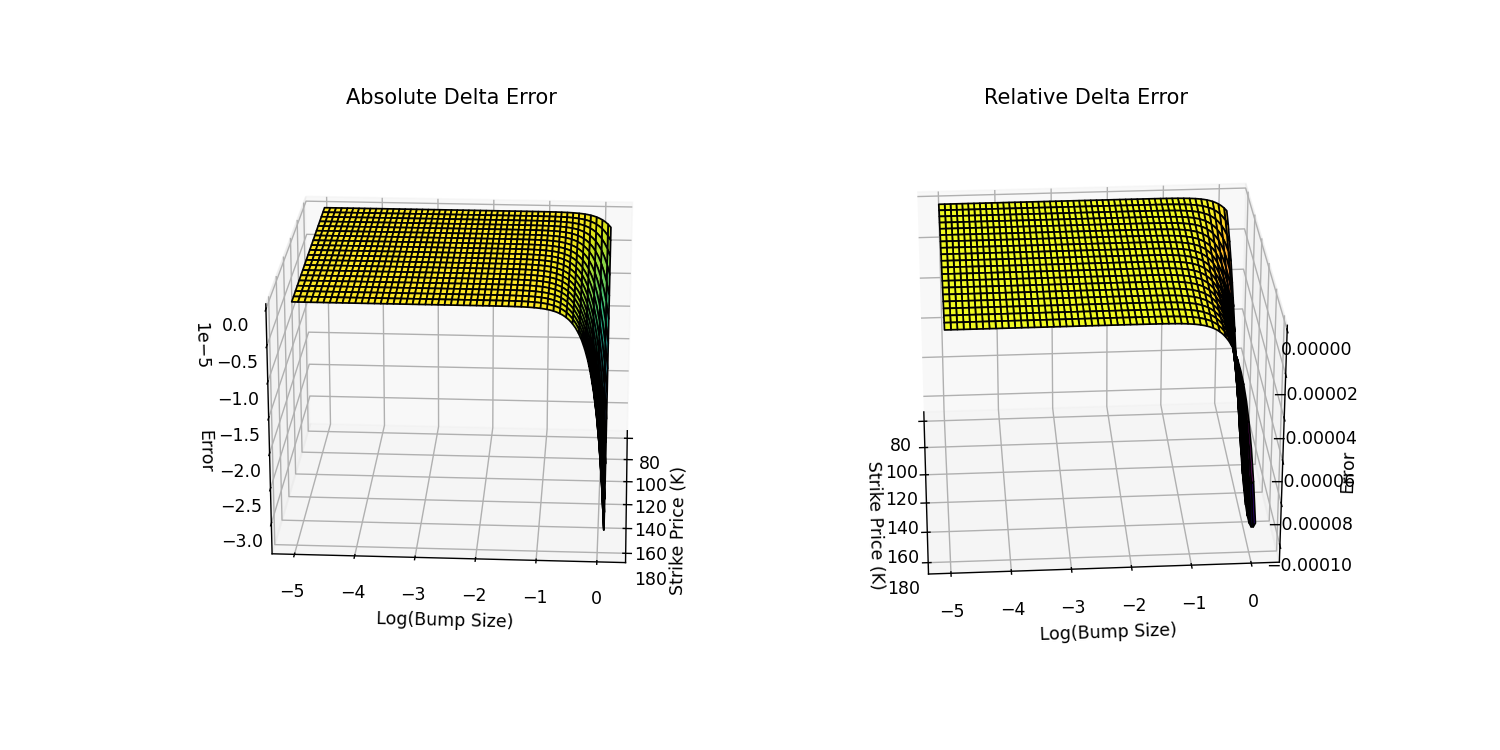

Text(0.5, 0, 'Error')

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook  

fig = plt.figure(figsize=(12, 6))

log_bump_size = np.log10(bump_size)
K_mesh, log_bump_mesh = np.meshgrid(K, log_bump_size)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(K_mesh, log_bump_mesh, abs_delta.T, cmap="viridis", edgecolor='k')
ax1.set_title("Absolute Delta Error")
ax1.set_xlabel("Strike Price (K)")
ax1.set_ylabel("Log(Bump Size)")
ax1.set_zlabel("Error")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(K_mesh, log_bump_mesh, rel_delta.T, cmap="plasma", edgecolor='k')
ax2.set_title("Relative Delta Error")
ax2.set_xlabel("Strike Price (K)")
ax2.set_ylabel("Log(Bump Size)")
ax2.set_zlabel("Error")

<IPython.core.display.Javascript object>


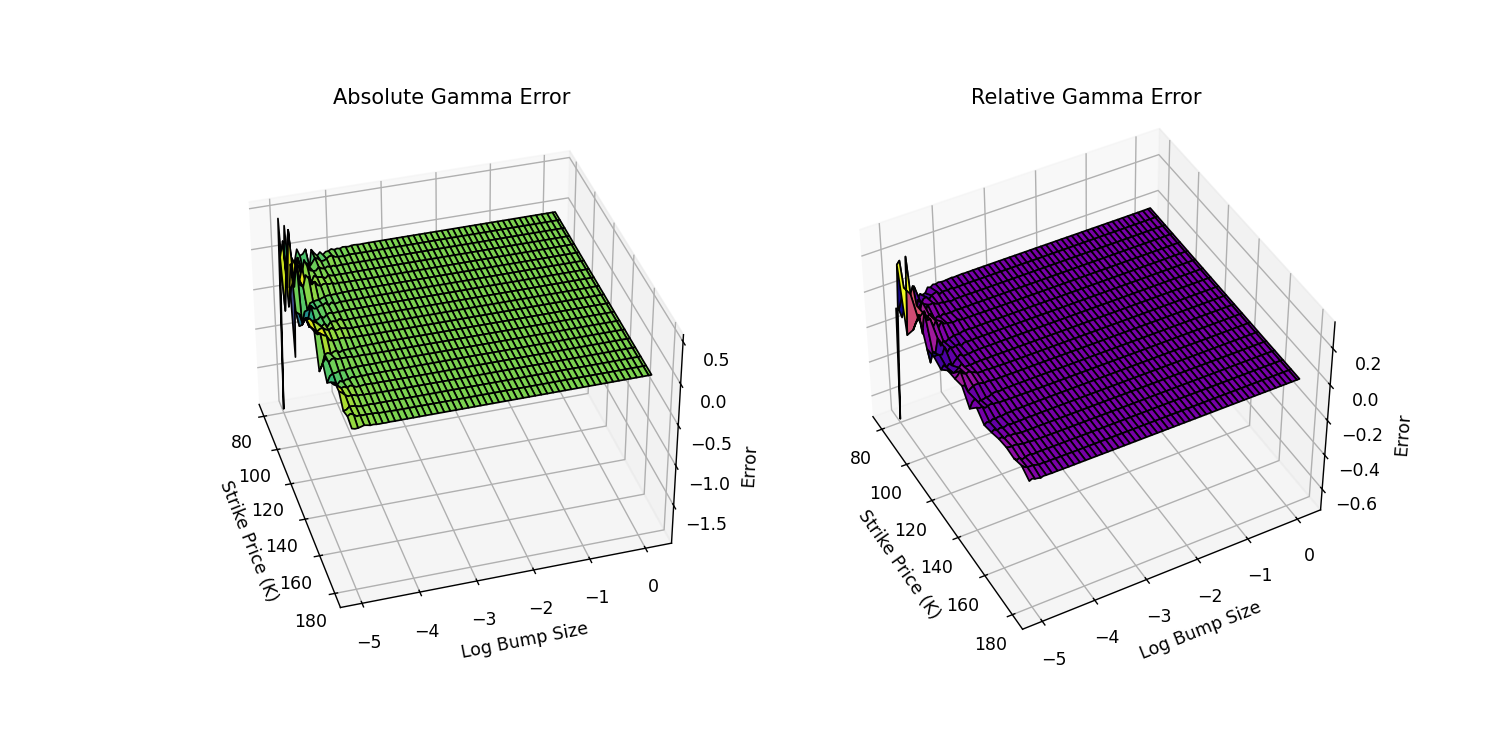

Text(0.5, 0, 'Error')

In [70]:
fig = plt.figure(figsize=(12, 6))

log_bump_size = np.log10(bump_size)
K_mesh, log_bump_mesh = np.meshgrid(K, log_bump_size)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(K_mesh, log_bump_mesh, abs_gamma.T, cmap="viridis", edgecolor='k')
ax1.set_title("Absolute Gamma Error")
ax1.set_xlabel("Strike Price (K)")
ax1.set_ylabel("Log Bump Size")
ax1.set_zlabel("Error")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(K_mesh, log_bump_mesh, rel_gamma.T, cmap="plasma", edgecolor='k')
ax2.set_title("Relative Gamma Error")
ax2.set_xlabel("Strike Price (K)")
ax2.set_ylabel("Log Bump Size")
ax2.set_zlabel("Error")


As it seems for each bump size delta error has an U-shape if we plot it against K, gamma error is increasing as K decreases. There's numerical instability for gamma if the size is too small. Let's plot errors on one figure for an ATM option.

<IPython.core.display.Javascript object>


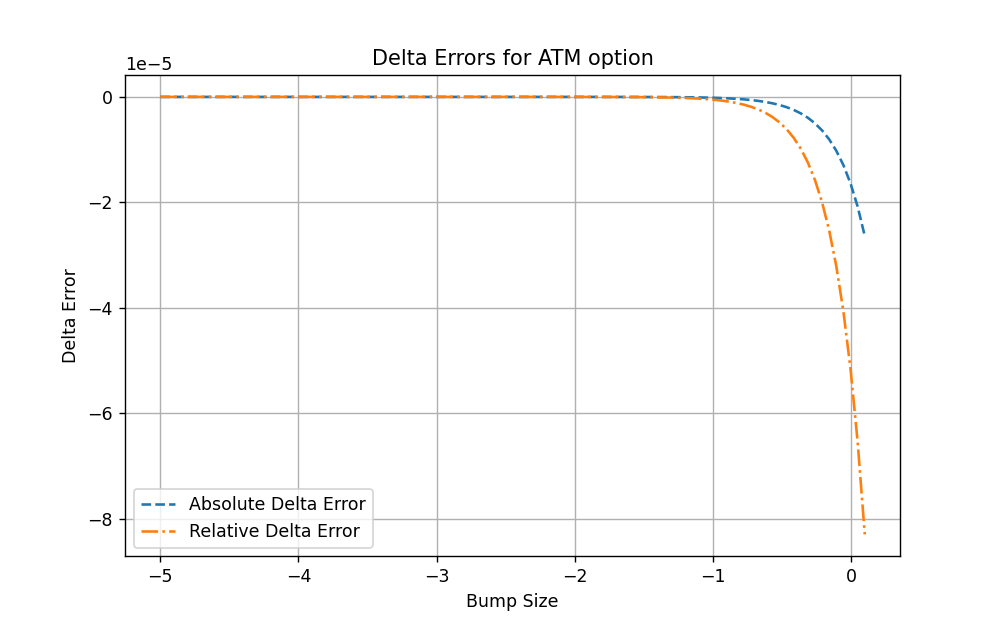

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(log_bump_size, abs_delta[10], label="Absolute Delta Error", linestyle="--")
plt.plot(log_bump_size, rel_delta[10], label="Relative Delta Error", linestyle="-.")

plt.xlabel("Bump Size")
plt.ylabel("Delta Error")
plt.title(f"Delta Errors for ATM option")
plt.legend()
plt.grid()

The smaller bump size we use, the smaller error we get. In the above setup the smallest available bump size was 1e-05 

<IPython.core.display.Javascript object>


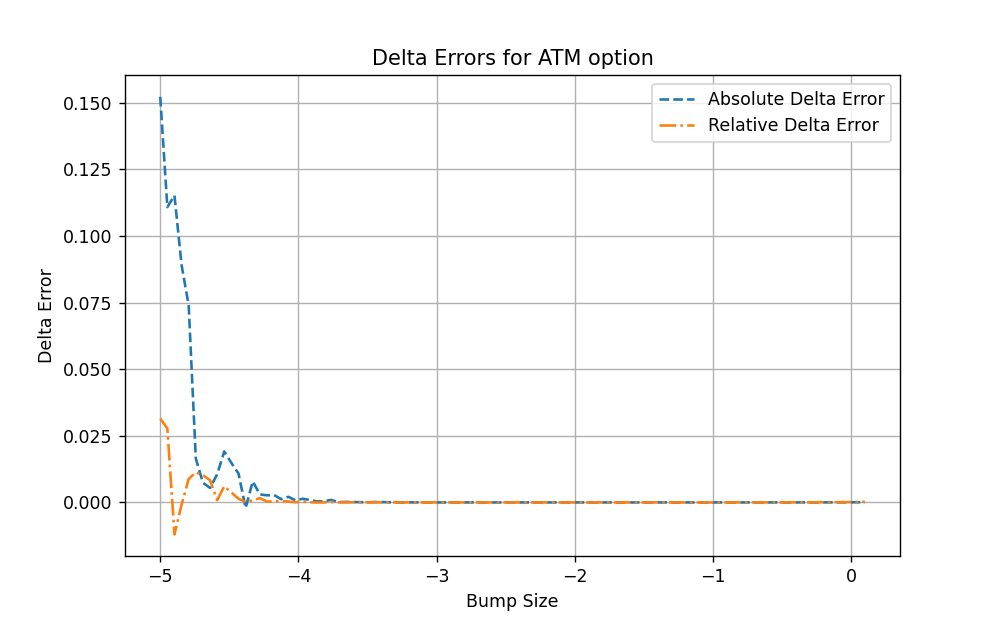

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(log_bump_size, abs_gamma[10], label="Absolute Delta Error", linestyle="--")
plt.plot(log_bump_size, rel_gamma[10], label="Relative Delta Error", linestyle="-.")

plt.xlabel("Bump Size")
plt.ylabel("Delta Error")
plt.title(f"Delta Errors for ATM option")
plt.legend()
plt.grid()

For gamma, the numerical instability is present if bump size is smaller then 1e-3. Let's plot just the good part.

<IPython.core.display.Javascript object>


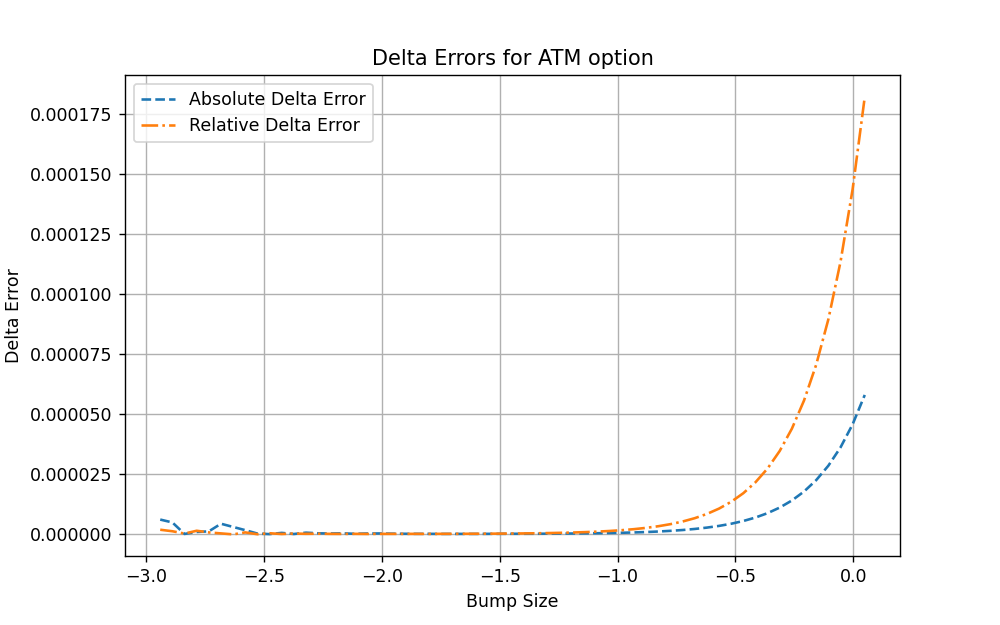

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(log_bump_size[40:-1], abs_gamma[10][40:-1], label="Absolute Delta Error", linestyle="--")
plt.plot(log_bump_size[40:-1], rel_gamma[10][40:-1], label="Relative Delta Error", linestyle="-.")

plt.xlabel("Bump Size")
plt.ylabel("Delta Error")
plt.title(f"Delta Errors for ATM option")
plt.legend()
plt.grid()

Based on the plots I would propose to use 0,1% relative error for the greek calculations.

Check for other options:

In [94]:
und =["BLUECHIP_BANK","TIPTOP_SOLUTIONS","MONEY_MALL"]
moneyness=[0.5, 0.7, 1, 1.2, 1.5]
expiry=np.linspace(0.1, 1, 5)

In [96]:
for i in und:
    K = [MarketData.get_spot()[i]*b for b in moneyness]
    for j in K:
        for k in expiry:
            model = BSVolModel(i)
            contract = EuropeanContract(i, "CALL", "Long", j, k)
            pricer=EuropeanAnalyticPricer(contract, model, Params())
            d_analytic=pricer.calc_delta("ANALYTIC")
            g_analytic=pricer.calc_gamma("ANALYTIC")
            pricer.finite_diff_method="CENTRAL"
            pricer.bump_size=0.001
            pricer.sizetype="RELATIVE"
            rel_delta=pricer.calc_delta("BUMP")/d_analytic-1
            rel_gamma=pricer.calc_gamma("BUMP")/g_analytic-1
            print("Errors for", i, "stock,", round(j, 2), "strike,", round(k, 2), "expiry")
            print("--Delta:", rel_delta)
            print("--Gamma:", rel_gamma)

Errors for BLUECHIP_BANK stock, 65.08 strike, 0.1 expiry
--Delta: -9.420242363944453e-13
--Gamma: -0.002248456396654497
Errors for BLUECHIP_BANK stock, 65.08 strike, 0.32 expiry
--Delta: -1.6984697759347966e-08
--Gamma: 2.2474591933718813e-05
Errors for BLUECHIP_BANK stock, 65.08 strike, 0.55 expiry
--Delta: -6.628653781426408e-08
--Gamma: 9.091713989439754e-06
Errors for BLUECHIP_BANK stock, 65.08 strike, 0.78 expiry
--Delta: -1.0122131277601198e-07
--Gamma: 5.274065212335088e-06
Errors for BLUECHIP_BANK stock, 65.08 strike, 1.0 expiry
--Delta: -1.1859842508066265e-07
--Gamma: 3.6332229744751032e-06
Errors for BLUECHIP_BANK stock, 91.12 strike, 0.1 expiry
--Delta: -1.3393422326757332e-07
--Gamma: 5.470992192457835e-05
Errors for BLUECHIP_BANK stock, 91.12 strike, 0.32 expiry
--Delta: -5.629980781574062e-07
--Gamma: 6.398608913382731e-06
Errors for BLUECHIP_BANK stock, 91.12 strike, 0.55 expiry
--Delta: -5.160729141806542e-07
--Gamma: 2.8063104726694377e-06
Errors for BLUECHIP_BANK sto

After testing many cases we saw no numerical problems arising from out choice.